In [1]:
#  Import libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as pplot
#import seaborn as seab
import sklearn as scikit

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Import carbon emissions dataset.
ce_global = pd.read_csv('data/Carbon_(CO2)_Emissions_by_Country.csv')
print(ce_global.head())

       Country Region        Date  Kilotons of Co2  Metric Tons Per Capita
0  Afghanistan   Asia  01-01-2011           8930.0                    0.31
1  Afghanistan   Asia  01-01-2012           8080.0                    0.27
2  Afghanistan   Asia  01-01-2010           7110.0                    0.25
3  Afghanistan   Asia  01-01-2019           6080.0                    0.16
4  Afghanistan   Asia  01-01-2018           6070.0                    0.17


In [3]:
# Filter global data to US
ce_global_filter = ce_global[ce_global['Country'] == 'United States']
ce_global_filter

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
5407,United States,Americas,01-01-2000,5775810.00,20.47
5408,United States,Americas,01-01-2005,5753490.23,19.47
5409,United States,Americas,01-01-2001,5748260.00,20.17
5410,United States,Americas,01-01-2004,5738290.04,19.60
5411,United States,Americas,01-01-2007,5736319.82,19.04
5412,United States,Americas,01-01-2003,5658990.23,19.51
5413,United States,Americas,01-01-2006,5653080.08,18.95
5414,United States,Americas,01-01-1999,5609020.00,20.10
5415,United States,Americas,01-01-2002,5593029.79,19.45
5416,United States,Americas,01-01-1998,5590540.00,20.27


In [4]:
# Data preparation for joining.
ce_global_filter['Year'] = ce_global_filter.apply(lambda x: pd.Series(pd.to_datetime(x[2]).year), axis = 1)
ce_global_filter = ce_global_filter.filter(items=['Country', 'Year', 'Kilotons of Co2'])
ce_global_filter 

C:\Users\grego\AppData\Local\Temp\ipykernel_13852\2418805219.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ce_global_filter['Year'] = ce_global_filter.apply(lambda x: pd.Series(pd.to_datetime(x[2]).year), axis = 1)
C:\Users\grego\AppData\Local\Temp\ipykernel_13852\2418805219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ce_global_filter['Year'] = ce_global_filter.apply(lambda x: pd.Series(pd.to_datetime(x[2]).year), axis = 1)


,Country,Year,Kilotons of Co2
5407,United States,2000,5775810.00
5408,United States,2005,5753490.23
5409,United States,2001,5748260.00
5410,United States,2004,5738290.04
5411,United States,2007,5736319.82
5412,United States,2003,5658990.23
5413,United States,2006,5653080.08
5414,United States,1999,5609020.00
5415,United States,2002,5593029.79
5416,United States,1998,5590540.00


In [5]:
# Import carbon emissions dataset.
ce_US = pd.read_csv('data\CO2_Emissions_US.csv')
print(ce_US.head())

   year state-name                                      sector-name  \
0  1970    Alabama              Industrial carbon dioxide emissions   
1  1970    Alabama              Industrial carbon dioxide emissions   
2  1970    Alabama              Industrial carbon dioxide emissions   
3  1970    Alabama              Industrial carbon dioxide emissions   
4  1970    Alabama  Total carbon dioxide emissions from all sectors   

     fuel-name       value  
0         Coal   26.721507  
1    Petroleum    3.577779  
2  Natural Gas    8.944097  
3    All Fuels   39.243383  
4    All Fuels  102.646851  


In [6]:
# Enrich carbon emissions dataset with million tons of CO2 ("value") by state, sector, and fuel dimensions.
ce_merged = ce_global_filter.merge(ce_US, left_on='Year', right_on= 'year')

ce_merged_filter = ce_merged.filter(items=['Year', 'state-name', 'Kilotons of Co2', 'value'])

ce_rename = ce_merged_filter.rename(columns={'state-name': 'State', 'value': 'Million Metric Tons'})

ce_rename

,Year,State,Kilotons of Co2,Million Metric Tons
0,2000,Alabama,5775810.0,0.014109
1,2000,Alabama,5775810.0,18.997993
2,2000,Alabama,5775810.0,85.908083
3,2000,Alabama,5775810.0,142.298577
4,2000,Alabama,5775810.0,25.287666
...,...,...,...,...
34213,1991,Wyoming,4807500.0,9.717897
34214,1991,Wyoming,4807500.0,55.495746
34215,1991,Wyoming,4807500.0,42.912113
34216,1991,Wyoming,4807500.0,7.288282


In [7]:
# Copy joined data. 
data = ce_rename.copy()

#Dependent variable
x_dep = data.drop(columns = {'Year', 'State', 'Million Metric Tons'}, axis = 1)

#Independent variable
y_indep = data.drop('Kilotons of Co2', axis = 1)

print(x_dep.head())

print(y_indep.head())

   Kilotons of Co2
0        5775810.0
1        5775810.0
2        5775810.0
3        5775810.0
4        5775810.0
   Year    State  Million Metric Tons
0  2000  Alabama             0.014109
1  2000  Alabama            18.997993
2  2000  Alabama            85.908083
3  2000  Alabama           142.298577
4  2000  Alabama            25.287666


In [8]:
x_dep.dtypes #select_dtypes(include='object').columns.to_list()

Kilotons of Co2    float64
dtype: object

In [9]:
# Convert categorical values to indicators 

y_indicators = pd.get_dummies(data=y_indep, columns=y_indep.select_dtypes(include='object').columns.to_list(),
              drop_first=True,
              dtype=int)

print(y_indicators.head())

   Year  Million Metric Tons  State_Alaska  State_Arizona  State_Arkansas  \
0  2000             0.014109             0              0               0   
1  2000            18.997993             0              0               0   
2  2000            85.908083             0              0               0   
3  2000           142.298577             0              0               0   
4  2000            25.287666             0              0               0   

   State_California  State_Colorado  State_Connecticut  State_Delaware  \
0                 0               0                  0               0   
1                 0               0                  0               0   
2                 0               0                  0               0   
3                 0               0                  0               0   
4                 0               0                  0               0   

   State_District of Columbia  ...  State_Tennessee  State_Texas  \
0                       

In [10]:
# Train and test data.

x_dep_train, x_dep_test, y_indep_train, y_indep_test = train_test_split(x_dep, y_indicators, test_size=0.1, random_state=30)

print(x_dep_train.head())
print(y_indep_train.head())

       Kilotons of Co2
12430       5558379.88
1066        5775810.00
986         5775810.00
8429        5609020.00
2061        5753490.23
       Year  Million Metric Tons  State_Alaska  State_Arizona  State_Arkansas  \
12430  2008            43.103884             0              0               0   
1066   2000            39.371244             0              0               0   
986    2000           211.611171             0              0               0   
8429   1999             1.197525             0              0               0   
2061   2005             0.507693             0              0               0   

       State_California  State_Colorado  State_Connecticut  State_Delaware  \
12430                 0               0                  0               0   
1066                  0               0                  0               0   
986                   0               0                  0               0   
8429                  0               0                  0     

In [11]:
# Linear regression output

linear_regression = LinearRegression()

lr = linear_regression.fit(x_dep_train, y_indep_train)

lr

LinearRegression()

In [12]:
# Regression intercepts and coefficients

intercept = lr.intercept_
coefficients = lr.coef_

print(intercept)
print(coefficients)

[2.02215062e+03 1.52282218e+01 1.83463640e-02 1.96680280e-02
 2.43234670e-02 1.56357485e-02 1.90795762e-02 1.41674816e-02
 1.98036664e-02 1.06653085e-02 1.63160161e-02 2.10231242e-02
 1.61194313e-02 8.83693491e-03 1.94179204e-02 1.71002968e-02
 2.28760420e-02 2.24895242e-02 1.92779487e-02 2.29825798e-02
 1.69453649e-02 2.42392953e-02 2.23008314e-02 1.71795263e-02
 1.80904206e-02 2.30167788e-02 1.62514763e-02 1.89221913e-02
 1.81641913e-02 2.56385622e-02 1.70363515e-02 1.55908431e-02
 1.71377715e-02 2.42854054e-02 2.34130199e-02 1.95512987e-02
 2.18773336e-02 2.21727255e-02 2.26822530e-02 1.33520602e-02
 1.19790266e-02 2.47399524e-02 1.57739405e-02 1.87627835e-02
 2.34190125e-02 2.17580892e-02 1.49256413e-02 2.03803459e-02
 2.05320983e-02 2.42650155e-02 1.85914511e-02 1.75503257e-02
 2.22267665e-02]
[[-3.38779087e-06]
 [ 4.29483090e-06]
 [ 2.39821192e-10]
 [-6.57670625e-11]
 [-1.03333623e-09]
 [ 6.60840699e-10]
 [ 1.25583637e-10]
 [ 8.52774188e-10]
 [-1.71379117e-10]
 [ 9.80986606e-10]


In [13]:
# Regression training predictions

train_indep_pred = lr.predict(x_dep_train)
test_indep_pred = lr.predict(x_dep_test)

print(train_indep_pred)
print(test_indep_pred)

[[2.00331999e+03 3.91005234e+01 1.96793813e-02 ... 1.93247718e-02
  2.00628938e-02 1.95783406e-02]
 [2.00258338e+03 4.00343490e+01 1.97315256e-02 ... 1.93534575e-02
  2.01611792e-02 1.94747407e-02]
 [2.00258338e+03 4.00343490e+01 1.97315256e-02 ... 1.93534575e-02
  2.01611792e-02 1.94747407e-02]
 ...
 [2.00258338e+03 4.00343490e+01 1.97315256e-02 ... 1.93534575e-02
  2.01611792e-02 1.94747407e-02]
 [2.00586381e+03 3.58756213e+01 1.94993044e-02 ... 1.92257077e-02
  1.97234717e-02 1.99361157e-02]
 [2.00271049e+03 3.98732071e+01 1.97225276e-02 ... 1.93485075e-02
  2.01442190e-02 1.94926180e-02]]
[[2.00573840e+03 3.60346160e+01 1.95081826e-02 ... 1.92305918e-02
  1.97402059e-02 1.99184766e-02]
 [2.00299916e+03 3.95072448e+01 1.97020924e-02 ... 1.93372656e-02
  2.01057013e-02 1.95332184e-02]
 [2.00522789e+03 3.66818040e+01 1.95443212e-02 ... 1.92504724e-02
  1.98083227e-02 1.98466767e-02]
 ...
 [2.00320260e+03 3.92493389e+01 1.96876911e-02 ... 1.93293432e-02
  2.00785566e-02 1.95618308e-02]

In [14]:
# Root squared mean

train_r2 = r2_score(y_true= y_indep_train, y_pred = train_indep_pred)
test_r2 = r2_score(y_true= y_indep_test, y_pred = test_indep_pred)

print(train_r2)
print(test_r2)

0.0003475180928823973
2.68515548558852e-05


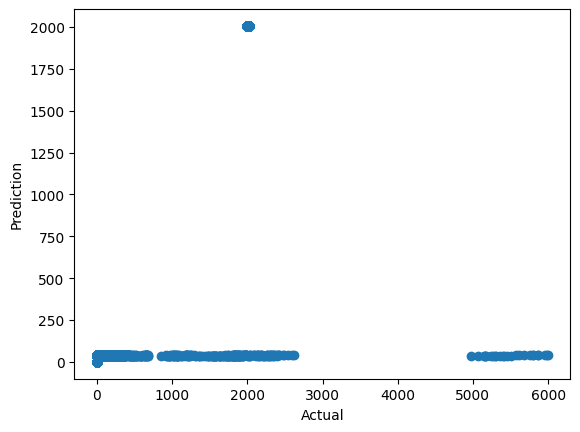

In [15]:
# Matplotlib visuals

pplot.scatter(y_indep_train, train_indep_pred)
pplot.xlabel("Actual")
pplot.ylabel("Prediction")
pplot.show()